# Proyecto: Clasificación de Actividades

## Importación de Datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci
from scipy.stats import mode
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

def get_stats(raw):
    data=raw.values
    PAGA_count=0
    x,y=[],[]
    for i in range(1,len(data)):
        xi,yi=[],[]
        for j in range(0,len(data[0])-1):
            xi.append(data[i][j])
        yi.append(data[i][len(data[0])-1])
        x.append(xi)
        y.append(yi)
     
    print("Cantidad de datos: {}".format(len(x)))
    print("Cantidad de características: {}".format(len(x[0])))
    for i in range(0,len(y)):
        if y[i][0]=='PAGA':
            PAGA_count+=1
    print("Cuantos clientes pagan: {}/{}:".format(PAGA_count,len(data)))
    return

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.read_csv('CREDITRISK_RAW.csv',delimiter=';')
dataset=dataset.dropna()
features = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y_data = dataset.iloc[:, [19]]

get_stats(dataset)

Cantidad de datos: 2239
Cantidad de características: 19
Cuantos clientes pagan: 1098/2240:


In [3]:
def fix(array):
    for r in range(array.shape[0]):
        for c in range(array.shape[1]):
            if c == 0 or c == 1 or c == 3 or c == 4 or c == 6 or c == 7 or c == 8 or c == 9 or c == 10 or c == 11 or c == 17:
                array[r,c] = re.sub(' +','',str(array[r,c]))
                array[r,c] = re.sub('\.','',str(array[r,c]))
            if c == 1 or c == 6 or c == 8 or c == 9 or c == 10 or c == 11:
                if str(array[r,c]) != 'nan' and str(array[r,c]) != '':
                    array[r,c] = int(array[r,c])
            if c == 12:
                if str(array[r,c]) != 'nan' and str(array[r,c]) != '':
                    if array[r,c]-int(array[r,c])>0.0:
                        array[r,c]=array[r,c]*1000
                    array[r,c]=array[r,c]*1000    
    return array

def completeNA(array, array_without_na):
    for r in range(array.shape[0]):
        for c in range(array.shape[1]):
            if c == 1 or c == 2 or c == 5 or c == 6 or c == 8 or c == 9 or c == 10 or c == 11 or c == 12 or c == 13 or c == 14 or c == 15 or c == 16:
                if str(array[r,c]) == 'nan' or str(array[r,c]) == '':
                    array[r,c] = np.mean(array_without_na[array_without_na[:,c] != '',c])
            if c == 0 or c== 7 or c == 3 or c == 4 or c == 17:
                if str(array[r,c]) == 'nan' or str(array[r,c]) == '' or str(array[r,c]) == ' ':
                    counter = Counter(featuresAsArray_without_na[:,c])
                    array[r,c] = counter.most_common(1)[0][0]
    return array

In [4]:
dataset = pd.read_csv('CREDITRISK_RAW.csv',delimiter=';')
dataset_without_na = dataset.copy().dropna()

features = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
features_without_na = dataset_without_na.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

featuresAsArray = np.asarray(features)
featuresAsArray_without_na = np.asarray(features_without_na)

featuresAsArray = fix(featuresAsArray)
featuresAsArray_without_na = fix(featuresAsArray_without_na)

featuresAsArray = completeNA(featuresAsArray, featuresAsArray_without_na)

y_data = dataset.iloc[:, [19]]
labelencoder_y = LabelEncoder()
y_data = labelencoder_y.fit_transform(y_data)
y_data = np.asarray(y_data)

get_stats(dataset)

Cantidad de datos: 2293
Cantidad de características: 19
Cuantos clientes pagan: 1121/2294:


C:\Users\Giopa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


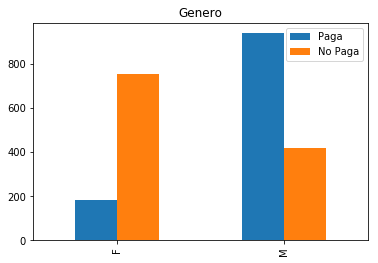

In [5]:
#Histograma Genero
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,0])
counter_genero_paga = Counter(featuresAsArray[y_data==1,0])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Genero')

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


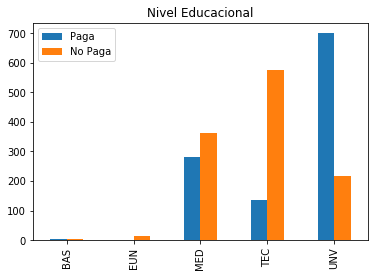

In [6]:
#Histograma Niv Educ
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,3])
counter_genero_paga = Counter(featuresAsArray[y_data==1,3])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Nivel Educacional')

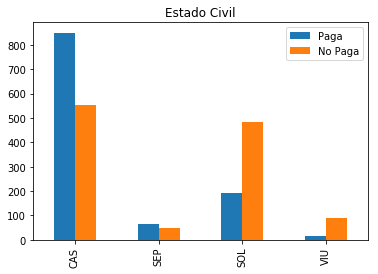

In [7]:
#Histograma Estado Civil
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,4])
counter_genero_paga = Counter(featuresAsArray[y_data==1,4])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Estado Civil')

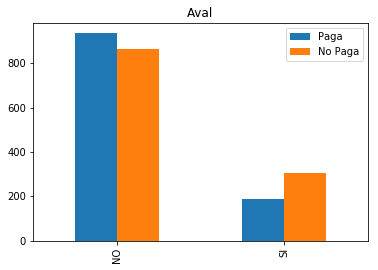

In [8]:
#Histograma Aval
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,17])
counter_genero_paga = Counter(featuresAsArray[y_data==1,17])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Aval')

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


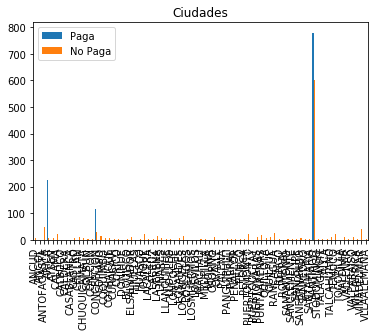

In [9]:
#Histograma Ciudades
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,7])
counter_genero_paga = Counter(featuresAsArray[y_data==1,7])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Ciudades')

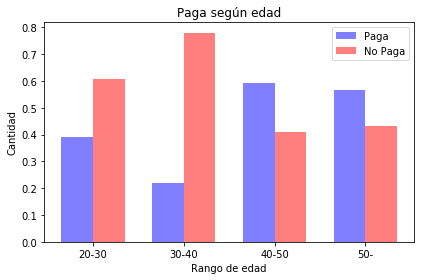

In [10]:
#grafico Edad
edad = dataset.iloc[:, [3]]
edad=edad.dropna()
edad_arr=edad.values
edad_arr=np.reshape(edad_arr,-1)

P_20,NP_20,P_30,NP_30,P_40,NP_40,P_50,NP_50=0,0,0,0,0,0,0,0

for i in range(0,len(edad_arr)):
    #mujer
    if int(edad_arr[i])>=20 and int(edad_arr[i])<30:
        if y_data[i]==1:
            P_20+=1
        else:
            NP_20+=1
    if int(edad_arr[i])>=30 and int(edad_arr[i])<40:
        if y_data[i]==1:
            P_30+=1
        else:
            NP_30+=1
    if int(edad_arr[i])>=40 and int(edad_arr[i])<50:
        if y_data[i]==1:
            P_40+=1
        else:
            NP_40+=1
    if int(edad_arr[i])>=50 :
        if y_data[i]==1:
            P_50+=1
        else:
            NP_50+=1
    

n_groups = 4

P_edad = (P_20/(P_20+NP_20), P_30/(P_30+NP_30), P_40/(P_40+NP_40), P_50/(P_50+NP_50))
NP_edad = (NP_20/(P_20+NP_20), NP_30/(P_30+NP_30), NP_40/(P_40+NP_40), NP_50/(P_50+NP_50))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_edad, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_edad, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Rango de edad')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según edad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('20-30', '30-40','40-50', '50-'))
ax.legend()

fig.tight_layout()
plt.show()

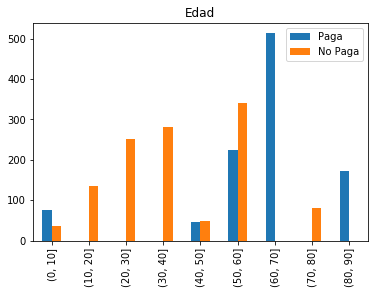

In [11]:
#Histograma Edad
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,2])
counter_genero_paga = Counter(featuresAsArray[y_data==1,2])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df1 = df1.groupby(pd.cut(df1["Paga"], np.arange(0, 100, 10))).sum()
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])
df2 = df2.groupby(pd.cut(df2["No Paga"], np.arange(0, 100, 10))).sum()


DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Edad')

### Código Oficina

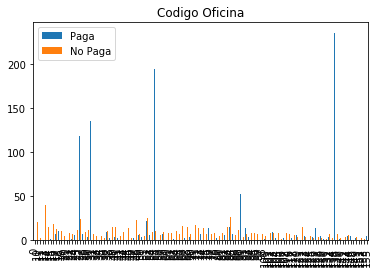

In [12]:
#Histograma Codigo oficina
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,5])
counter_genero_paga = Counter(featuresAsArray[y_data==1,5])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Codigo Oficina')

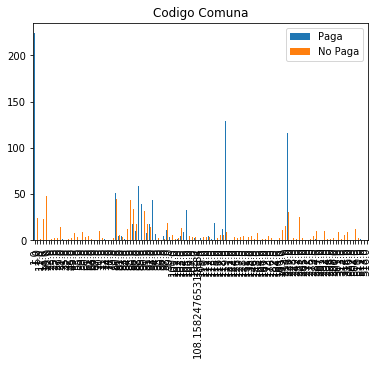

In [13]:
#Histograma Codigo Comuna
counter_genero_no_paga = Counter(featuresAsArray[y_data==0,6])
counter_genero_paga = Counter(featuresAsArray[y_data==1,6])
df1 = pd.DataFrame.from_dict(counter_genero_paga, orient='index', columns=['Paga'])
df2 = pd.DataFrame.from_dict(counter_genero_no_paga, orient='index', columns=['No Paga'])

DF = pd.concat([df1,df2], axis=1)

DFGPlot = DF.plot(kind='bar', title = 'Codigo Comuna')

### Mora

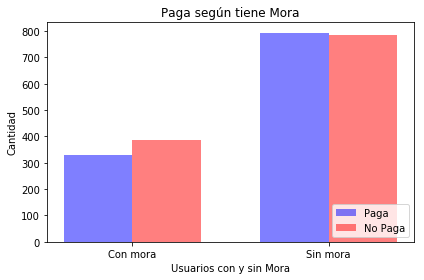

In [14]:
#Nivel Educacional
mora = dataset.iloc[:, [14]]

mora_P=mora[y_data==1]
mora_NP=mora[y_data==0]

cMora_P=mora_P[mora_P>0]
sMora_P=mora_P[mora_P==0]
cMora_NP=mora_NP[mora_NP>0]
sMora_NP=mora_NP[mora_NP==0]

n_groups = 2

P_dias_mora = (len(cMora_P.dropna()), len(sMora_P.dropna()))
NP_dias_mora = (len(cMora_NP.dropna()), len(sMora_NP.dropna()))


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_dias_mora, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_dias_mora, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Usuarios con y sin Mora')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según tiene Mora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Con mora','Sin mora'))
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

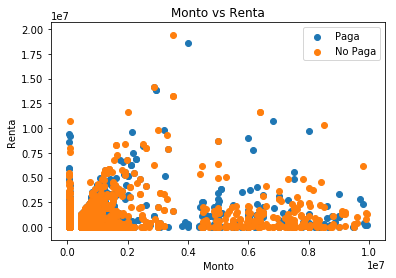

In [15]:
# MONTO vs RENTA
renta = dataset_without_na.iloc[:, [2]]
monto = dataset_without_na.iloc[:, [13]]

renta_arr=renta.values
renta_arr=np.reshape(renta_arr,-1)

monto_arr=monto.values
monto_arr=np.reshape(monto_arr,-1)

monto_P,monto_NP=[],[]
renta_P,renta_NP=[],[]

renta_arr = [w.replace('.', '') for w in renta_arr]

for i in range(0,len(monto_arr)):
    if monto_arr[i]-int(monto_arr[i])>0.0:
        monto_arr[i]=monto_arr[i]*1000
    monto_arr[i]=int(monto_arr[i])*1000

#print(monto_arr)
#print(monto_arr[4])
#print(type(monto_arr[0]))

for i in range(0,len(renta_arr)):    
    if y_data[i]==1:
        monto_P.append(int(monto_arr[i]))
        renta_P.append(int(renta_arr[i]))
    else:
        monto_NP.append(int(monto_arr[i]))
        renta_NP.append(int(renta_arr[i]))

plt.scatter(renta_P,monto_P)
plt.scatter(renta_NP,monto_NP)
plt.legend(['Paga','No Paga'])
plt.xlabel('Monto')
plt.ylabel('Renta')
plt.title('Monto vs Renta')
plt.show()

In [16]:
labelencoder_X = LabelEncoder()
featuresAsArray[:,0] = labelencoder_X.fit_transform(featuresAsArray[:,0])
featuresAsArray[:,3] = labelencoder_X.fit_transform(featuresAsArray[:,3])
featuresAsArray[:,4] = labelencoder_X.fit_transform(featuresAsArray[:,4])
featuresAsArray[:,7] = labelencoder_X.fit_transform(featuresAsArray[:,7])
featuresAsArray[:,17] = labelencoder_X.fit_transform(featuresAsArray[:,17])

In [17]:
array_features_paga = np.asarray(featuresAsArray[y_data==1,:])
array_features_no_paga = np.asarray(featuresAsArray[y_data==0,:])
sizeData_paga = array_features_paga.shape
sizeData_no_paga = array_features_no_paga.shape

C:\Users\Giopa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


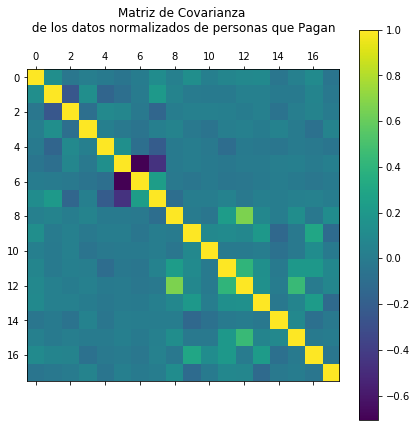

In [18]:
sarray_features_paga = StandardScaler().fit(array_features_paga)
narray_features_paga = sarray_features_paga.transform(array_features_paga)

#Matriz de Covarianza-Varianza
covar = np.dot(narray_features_paga.transpose(),narray_features_paga)/narray_features_paga.shape[0]
covar.shape
plt.figure(figsize=(7,7))
figCovar = plt.matshow(covar,fignum=1)
var = plt.colorbar()
plt.title("Matriz de Covarianza \n de los datos normalizados de personas que Pagan \n")
plt.show()

C:\Users\Giopa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


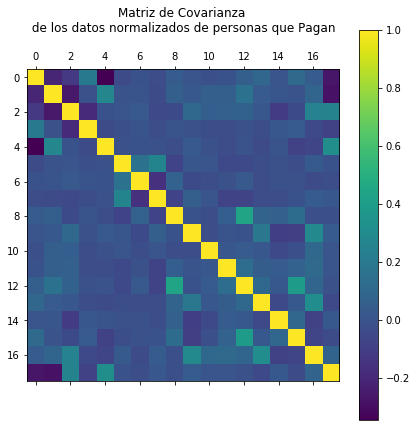

In [19]:
sarray_features_no_paga = StandardScaler().fit(array_features_no_paga)
narray_features_no_paga = sarray_features_no_paga.transform(array_features_no_paga)

#Matriz de Covarianza-Varianza
covar = np.dot(narray_features_no_paga.transpose(),narray_features_no_paga)/narray_features_no_paga.shape[0]
covar.shape
plt.figure(figsize=(7,7))
figCovar = plt.matshow(covar,fignum=1)
var = plt.colorbar()
plt.title("Matriz de Covarianza \n de los datos normalizados de personas que Pagan \n")
plt.show()

In [20]:
# División de conjuntos de Entrenamiento, Test y Validacion
featEntVal, featTest, classEntVal, classTest = train_test_split(featuresAsArray, y_data, test_size = 0.2, train_size = 0.8, stratify=y_data)
featEnt, featVal, classEnt, classVal = train_test_split(featEntVal, classEntVal, test_size = 0.25, stratify=classEntVal)

# Algoritmos de Machine Learning

## PCA

In [23]:
print(len(featuresAsArray))
print(len(y_data))

# Visualizacion de Datos en 2 dimensiones (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pd.DataFrame(pca.fit_transform(featEnt))
#plt.scatter(x_train[classEnt==0][0], classEnt[y_data==0][1], s=2, label='No Paga', c='red')
#plt.scatter(x_train[classEnt==1][0], classEnt[y_data==1][1], s=2, label='Paga', c='blue')
#plt.title('Datos con Dimensionalidad Reducida (PCA)')
#plt.legend()
#plt.show()


2294
2294


## K-means

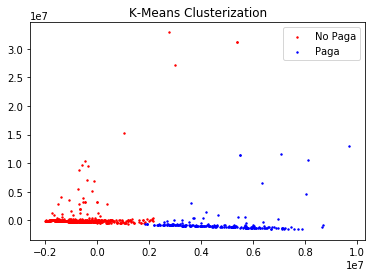

Accuracy: 51.09011627906976 %


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(featEnt)
centroids_km = kmeans.cluster_centers_
labels_km = kmeans.labels_
result = np.sum(classEnt == labels_km) / len(classEnt)
acc_km = max(1 - result, result)
plt.scatter(x_train[labels_km==0][0], x_train[labels_km==0][1], s=2, label='No Paga'
, c='red')
plt.scatter(x_train[labels_km==1][0], x_train[labels_km==1][1], s=2, label='Paga', c
='blue')
plt.title('K-Means Clusterization')
plt.legend()
plt.show()
print("Accuracy: " + str(acc_km * 100) + " %")

In [26]:
# Primer Clasificador con Redes Neuronales
from sklearn.preprocessing import StandardScaler

sFeatEnt = StandardScaler().fit(featEnt)
nFeatEnt = sFeatEnt.transform(featEnt)

sFeatVal = StandardScaler().fit(featVal)
nFeatVal = sFeatVal.transform(featVal)

sFeatTest = StandardScaler().fit(featTest)
nFeatTest = sFeatTest.transform(featTest)

clf1 = MLPClassifier(solver='lbfgs',activation="relu", hidden_layer_sizes = 20, early_stopping = True, validation_fraction = 0.25)
clf1.fit(nFeatEnt, classEnt)
classPredict1 = clf1.predict(nFeatVal)
confusionMatrix1 = confusion_matrix(classVal, classPredict1)

C:\Users\Giopa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
#Segundo Clasificador con SVM
from sklearn.svm import *

clf2 = LinearSVC()
clf2.fit(nFeatEnt, classEnt)
classPredict2 = np.sign(clf2.decision_function(nFeatVal))
classPredict2[classPredict2==-1]=0
confusionMatrix2 = confusion_matrix(classVal, classPredict2)

In [28]:
#Tercer Clasificador con Bayes
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(featEnt, classEnt)
GaussianNB(priors=None)
classPredict3 = clf3.predict(featVal)
confusionMatrix3 = confusion_matrix(classVal, classPredict3)

In [29]:
# Decision Tree
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(featEnt, classEnt)
tree_predictions = tree_classifier.predict(featVal)
confusionMatrix4 = confusion_matrix(classVal, tree_predictions)

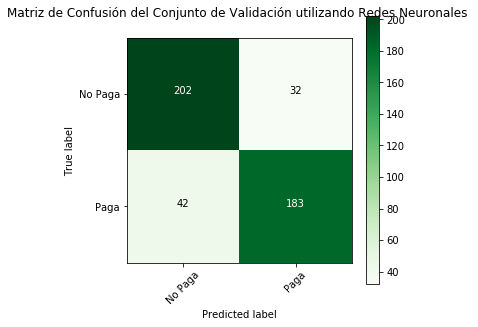

% de aciertos del clasificador es: 83.87799564270152


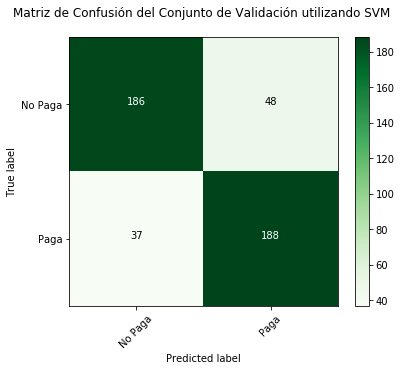

% de aciertos del clasificador es: 81.48148148148148


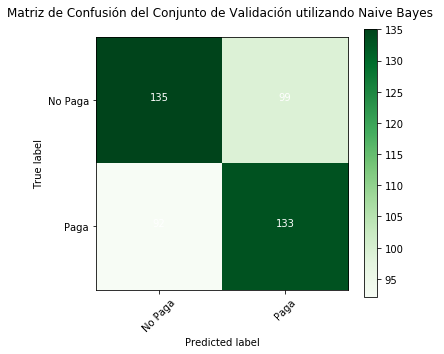

% de aciertos del clasificador es: 58.38779956427015


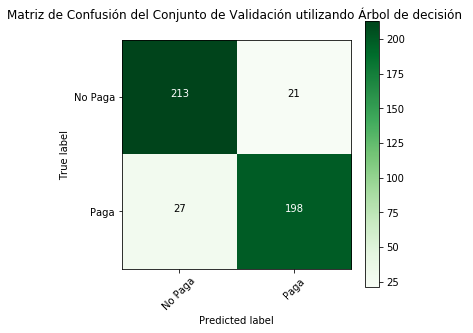

% de aciertos del clasificador es: 89.54248366013071


In [30]:
from functions import *
clases=['No Paga','Paga']
plot_confusion_matrix('d',True,confusionMatrix1,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Redes Neuronales \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix1)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix2,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando SVM \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix2)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix3,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Naive Bayes \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix3)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix4,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Árbol de decisión \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix4)*100/featVal.shape[0]))

## Selección de características

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
var_k = 6
selector = SelectKBest(score_func=mutual_info_classif, k=var_k).fit(featEnt, classEnt)

featEntValn= selector.transform(featEntVal)
featEntn= selector.transform(featEnt)
featValn=selector.transform(featVal)
featTestn=selector.transform(featTest)

scoresKBest = selector.scores_

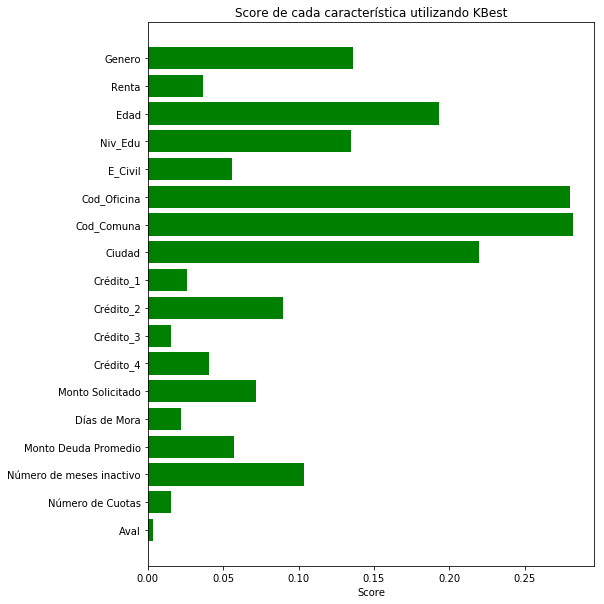

In [32]:
caractstr = ('Genero', 'Renta', 'Edad', 'Niv_Edu', 'E_Civil', 'Cod_Oficina', 'Cod_Comuna', 'Ciudad', 'Crédito_1', 'Crédito_2', 'Crédito_3', 'Crédito_4', 'Monto Solicitado', 'Días de Mora', 'Monto Deuda Promedio', 'Número de meses inactivo', 'Número de Cuotas', 'Aval')

plot_scores(selector, scoresKBest, caractstr)

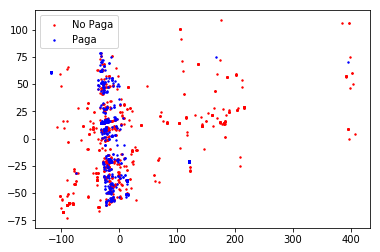

In [34]:
# Visualizacion de Datos en 2 dimensiones (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pcan = pd.DataFrame(pca.fit_transform(featEntValn))
plt.scatter(x_pcan[classEntVal==0][0], x_pcan[classEntVal==0][1], s=2, label='No Paga', c='red')
plt.scatter(x_pcan[classEntVal==1][0], x_pcan[classEntVal==1][1], s=2, label='Paga', c='blue')
plt.title('')
plt.legend()
plt.show()


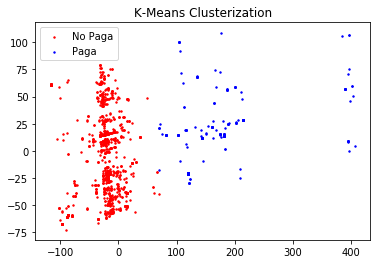

Accuracy: 63.818657367044466 %


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(featEntValn)
centroids_km = kmeans.cluster_centers_
labels_km = kmeans.labels_
result = np.sum(classEntVal == labels_km) / len(y_data)
acc_km = max(1 - result, result)
plt.scatter(x_pcan[labels_km==0][0], x_pcan[labels_km==0][1], s=2, label='No Paga'
, c='red')
plt.scatter(x_pcan[labels_km==1][0], x_pcan[labels_km==1][1], s=2, label='Paga', c
='blue')
plt.title('K-Means Clusterization')
plt.legend()
plt.show()
print("Accuracy: " + str(acc_km * 100) + " %")

### Redes Neuronales

In [36]:
#Nuevo Clasificador de Redes Neuronales
var_hidden = int(20)

sFeatEntn = StandardScaler().fit(featEntn)
nFeatEntn = sFeatEntn.transform(featEntn)

sFeatValn = StandardScaler().fit(featValn)
nFeatValn = sFeatValn.transform(featValn)

sFeatTestn = StandardScaler().fit(featTestn)
nFeatTestn = sFeatTestn.transform(featTestn)

clf4 = MLPClassifier(solver='lbfgs',activation="relu", hidden_layer_sizes = var_hidden, early_stopping = True, validation_fraction = 0.25)
clf4.fit(nFeatEntn, classEnt)
classPredict4 = clf4.predict(nFeatValn)
confusionMatrix4 = confusion_matrix(classVal, classPredict4)

### Support Vector Machine

In [37]:
clf5 = LinearSVC()
clf5.fit(nFeatEntn, classEnt)
classPredict5 = np.sign(clf5.decision_function(nFeatValn))
classPredict5[classPredict5==-1]=0
confusionMatrix5 = confusion_matrix(classVal, classPredict5)

### Naive Bayes

In [38]:
#Nuevo Clasificador con Bayes
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(featEntn, classEnt)
GaussianNB(priors=None)
classPredict5 = clf3.predict(featValn)
confusionMatrix6 = confusion_matrix(classVal, classPredict5)

### Árbol de decisión

In [39]:
# Decision Tree
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(featEntn, classEnt)
tree_predictions = tree_classifier.predict(featValn)
confusionMatrix7 = confusion_matrix(classVal, tree_predictions)

### Regresión Logística

In [40]:
# Regresion Logistica de variables continuas
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(featEntn, classEnt)
logreg_predictions = logreg.predict(featValn)
confusionMatrix8 = confusion_matrix(classVal, logreg_predictions)

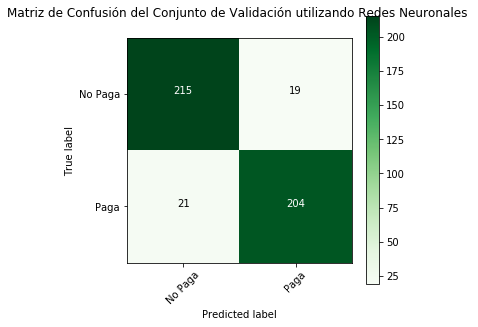

% de aciertos del clasificador es: 91.28540305010893


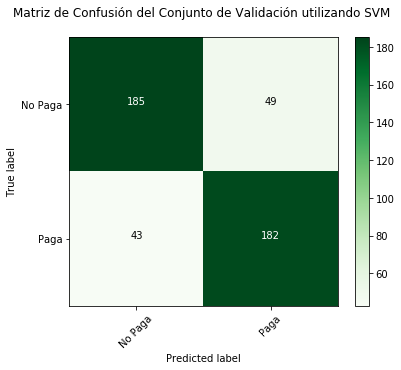

% de aciertos del clasificador es: 79.95642701525054


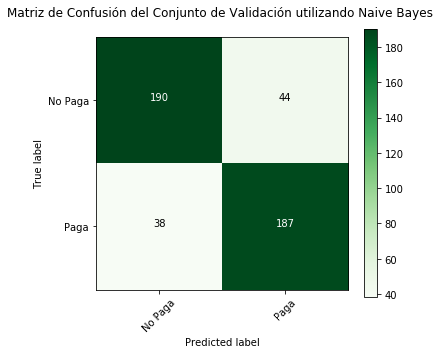

% de aciertos del clasificador es: 82.13507625272331


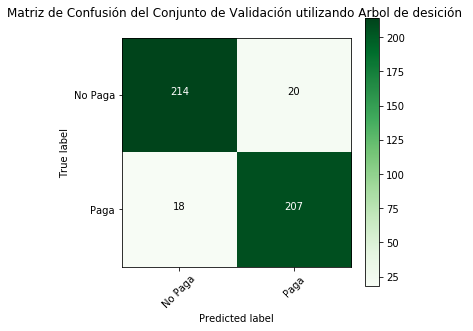

% de aciertos del clasificador es: 91.72113289760348


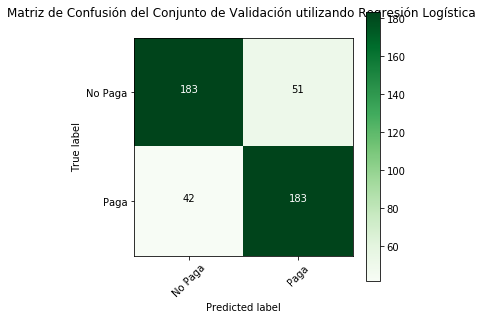

% de aciertos del clasificador es: 79.73856209150327


In [41]:
plot_confusion_matrix('d',True,confusionMatrix4,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Redes Neuronales \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix4)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix5,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando SVM \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix5)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix6,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Naive Bayes \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix6)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix7,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Arbol de desición \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix7)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix8,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Regresión Logística \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix8)*100/featVal.shape[0]))